In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


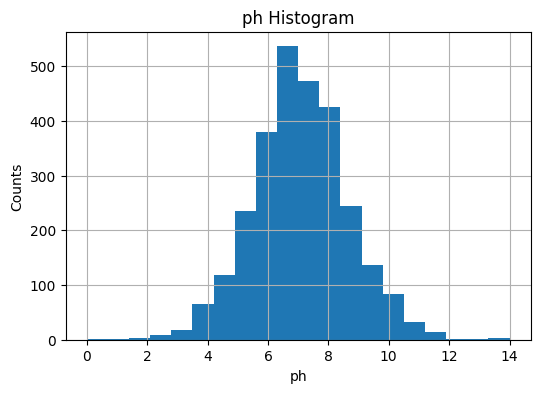

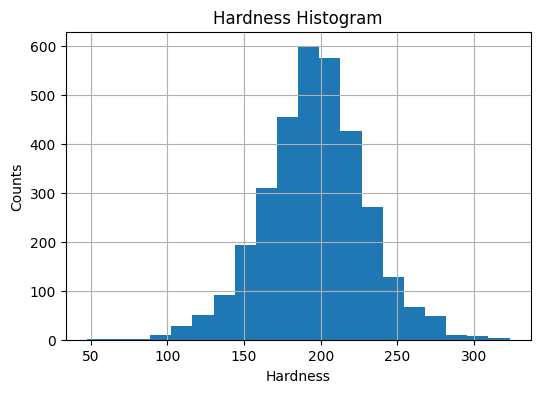

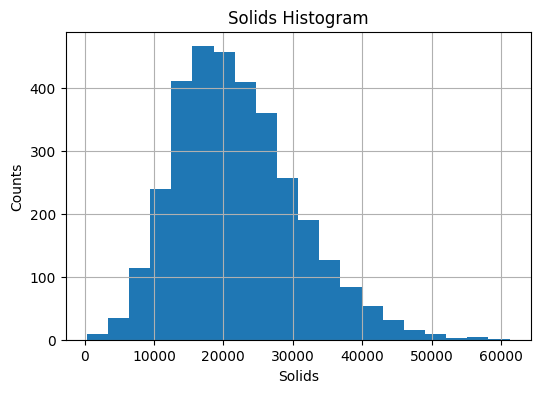

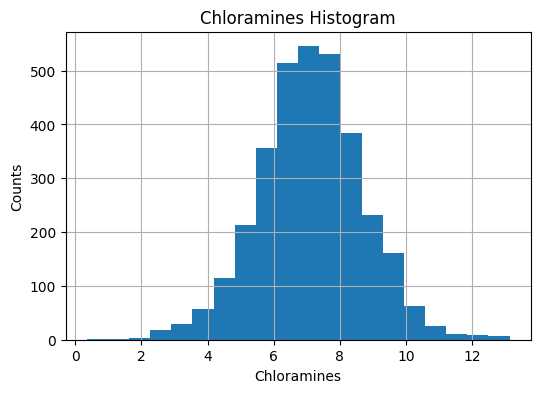

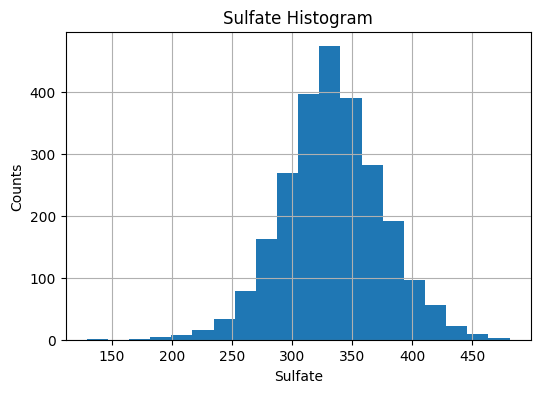

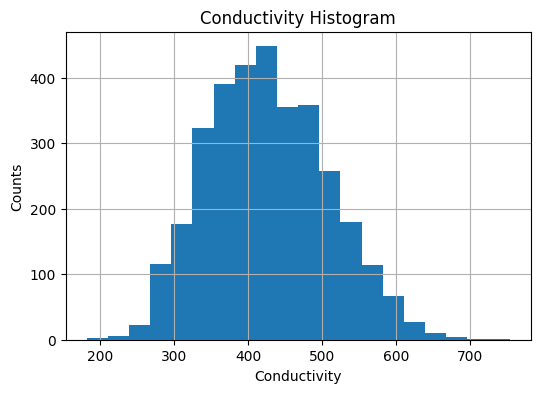

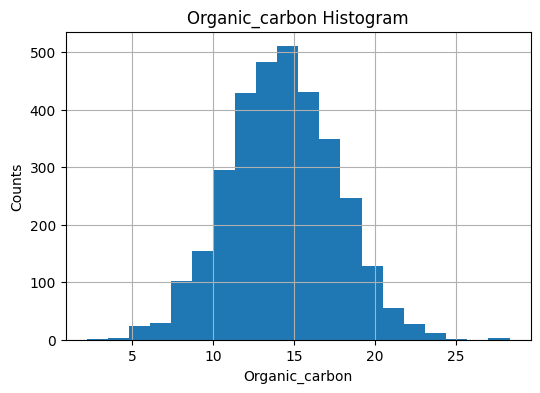

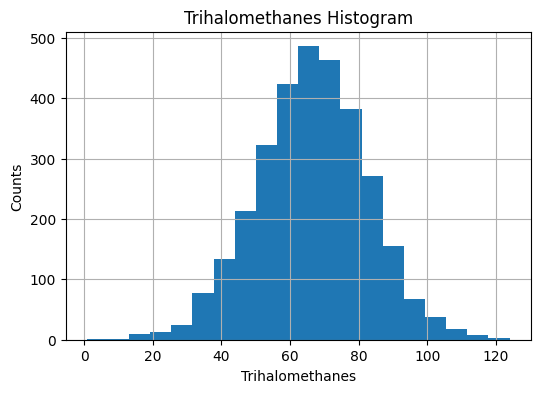

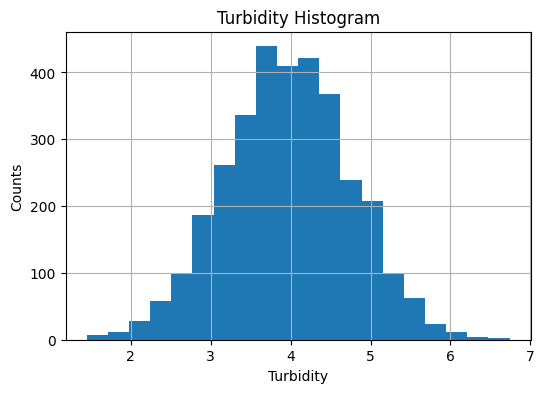

In [ ]:
for column in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    df[column].hist(bins=20)
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.show()

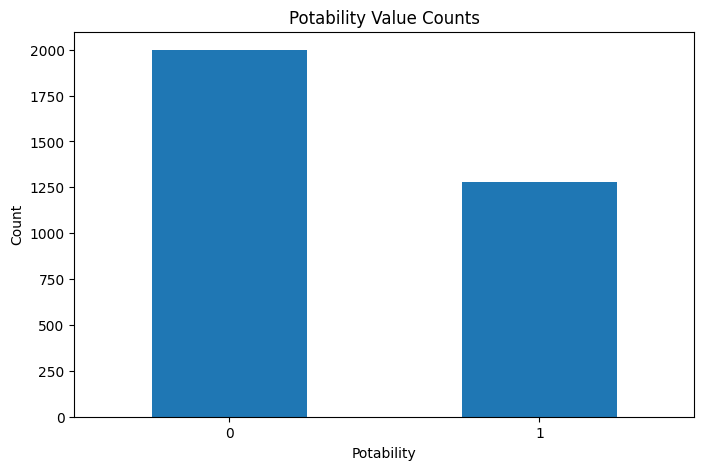

In [ ]:
df['Potability'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.title('Potability Value Counts')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df['Potability'].value_counts(normalize=True) * 100

,proportion
Potability,
0,60.989011
1,39.010989


Παρατηρούμε ότι η ποιότητα των δεδομένων δεν είναι ικανοποιητική. Αυτό μπορούμε να το συμπαιράνουμε από διάφορα στοιχεία όπως είναι το πλήθος των ελλειπών τιμών ή το εύρων των τιμών κάποιων μεταβλητών. Για παράδειγμα, οι μεταβλητές ph, Sulfate	και	Trihalomethanes	έχουν ελλειπές τιμές 491, 781 και 162 αντίστοιχα. Επίσης, η μεταβλητή Solids έχει μεγάλο εύρος τιμών από 320-61.000. Τέλος, η μεταβλητή Potability φαίνεται να παρουσιάζει μια μικρή διαφορά στα δεδομένα, καθώς τα δεδομένα του μη-πόσιμου νερού είναι περισσότερα από τα δεδομένα του πόσιμου νερού. Αυτά τα στοιχεία υποδειλώνουν ότι η ποιότητα των δεδομένων δεν είναι ικανοποιητική.

In [ ]:
df['pH_category'] = pd.cut(df['ph'],bins=[0, 6.5, 8.5, 15],labels=['<6.5', '6.5–8.5', '>8.5'])

results = (df.groupby('Potability')['pH_category'].value_counts(normalize=True).unstack() * 100).round(2)

results.columns = ['<6.5', '6.5–8.5', '>8.5']

print(results)

             <6.5  6.5–8.5   >8.5
Potability                       
0           36.30    44.27  19.43
1           32.33    52.95  14.71


In [ ]:
df['pH_category'] = pd.cut(df['ph'],bins=[0, 6.5, 8.5, 15],labels=['<6.5', '6.5–8.5', '>8.5'])

results = (df.groupby('pH_category')['Potability'].value_counts(normalize=True).unstack() * 100).round(2)

print(results)

Potability       0      1
pH_category              
<6.5         63.19  36.81
6.5–8.5      56.10  43.90
>8.5         66.87  33.13


/tmp/ipython-input-1904254834.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = (df.groupby('pH_category')['Potability'].value_counts(normalize=True).unstack() * 100).round(2)


Παρατηρούμε ότι σχεδόν το 50% των τιμών του πόσιμου νερού συγκεντρώνονται στις τιμές ph 6.5-8.5, ενώ το υπόλοιπο 50% επιμοιράζεται στις υπόλοιπες κατηγορίες με την κατηγορία <6.5 να περιλαμβάνει το 32% των τιμών και την κατηγορία >8.5 το 15% των τιμών.

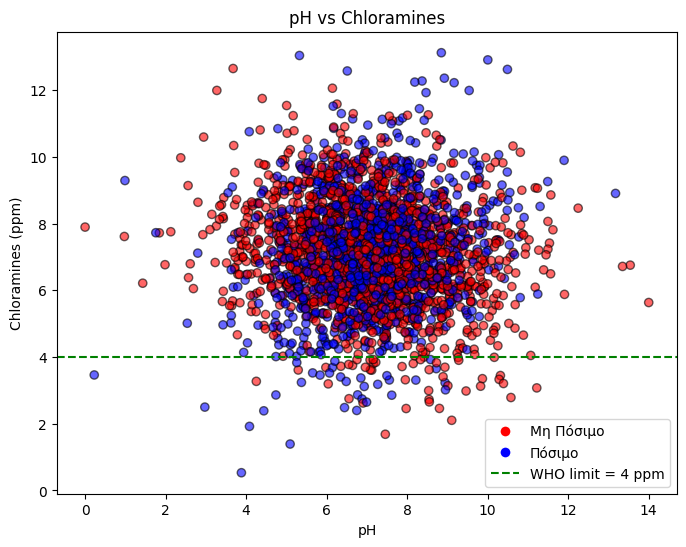

In [ ]:
colors = df['Potability'].map({0: 'red', 1: 'blue'})

plt.figure(figsize=(8,6))
plt.scatter(df['ph'], df['Chloramines'], c=colors, alpha=0.6, edgecolor='k')
plt.axhline(y=4, color='green', linestyle='--', label='WHO limit = 4 ppm')
plt.xlabel('pH')
plt.ylabel('Chloramines (ppm)')
plt.title('pH vs Chloramines')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Μη Πόσιμο', markerfacecolor='red', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Πόσιμο', markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], color='green', linestyle='--', label='WHO limit = 4 ppm')
])
plt.show()

Με βάση το παραπάνω διάγραμμα διασποράς, παρατηρούμε ότι υπάρχει επικάλυψη των δειγμάτων μεταξύ πόσιμου και μη-πόσιμου νερού. Επιπλέον, βλέπουμε ότι τα περισσότεερα δείγματα βρίσκονται άνω της διαχωριστικής γραμμής 4 ppm αλλά δεν αποτλεί ένα ξεκάθαρο όριο για τις τιμές της μεταβλητής Potability. Αυτό σημαίνει ότι οι μεταβλητές Chloramines και pH δεν είναι επαρκείς για τον πλήρη διαχωρισμό της μεταβλητής Potability.


In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [ ]:
input_df = df.drop(columns=['Potability','pH_category'])
targets_df = df['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()

In [ ]:
input_df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [ ]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred = dt.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred)

y_test_pred = dt.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Accuracy στο train set: {train_acc:}')
print(f'Accuracy στο test set: {test_acc:}')

Accuracy στο train set: 1.0
Accuracy στο test set: 0.5798575788402849


In [ ]:
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_list = [None, 'sqrt']
ccp_alphas = [0, 0.01]

results = []

In [ ]:
from itertools import product
for params in product(criteria, max_depths, min_samples_splits, min_samples_leafs, max_features_list, ccp_alphas):
    criterion, max_depth, min_samples_split, min_samples_leaf, max_features, ccp_alpha = params
    dt = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        ccp_alpha=ccp_alpha)

    dt.fit(x_train, y_train)


    y_train_pred = dt.predict(x_train)
    y_test_pred = dt.predict(x_test)


    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)


    results.append({
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'ccp_alpha': ccp_alpha,
        'train_acc': train_acc,
        'test_acc': test_acc
    })


results_df = pd.DataFrame(results)

print(results_df)

   criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
0       gini        NaN                  2                 1         None   
1       gini        NaN                  2                 1         None   
2       gini        NaN                  2                 1         sqrt   
3       gini        NaN                  2                 1         sqrt   
4       gini        NaN                  2                 2         None   
..       ...        ...                ...               ...          ...   
91   entropy        5.0                  5                 1         sqrt   
92   entropy        5.0                  5                 2         None   
93   entropy        5.0                  5                 2         None   
94   entropy        5.0                  5                 2         sqrt   
95   entropy        5.0                  5                 2         sqrt   

    ccp_alpha  train_acc  test_acc  
0        0.00   1.000000  0.578840  
1

In [ ]:
subset = results_df[results_df['max_depth'] == 3]

best_row = subset.loc[subset['test_acc'].idxmax()]

print("Καλύτερος συνδυασμός παραμέτρων:")
print(best_row)

Καλύτερος συνδυασμός παραμέτρων:
criterion             entropy
max_depth                 3.0
min_samples_split           2
min_samples_leaf            1
max_features             None
ccp_alpha                 0.0
train_acc            0.641082
test_acc             0.639878
Name: 64, dtype: object


In [ ]:
best_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth= 3,
    min_samples_split= 2,
    min_samples_leaf= 1,
    max_features= None,
    ccp_alpha= 0)


best_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=3)

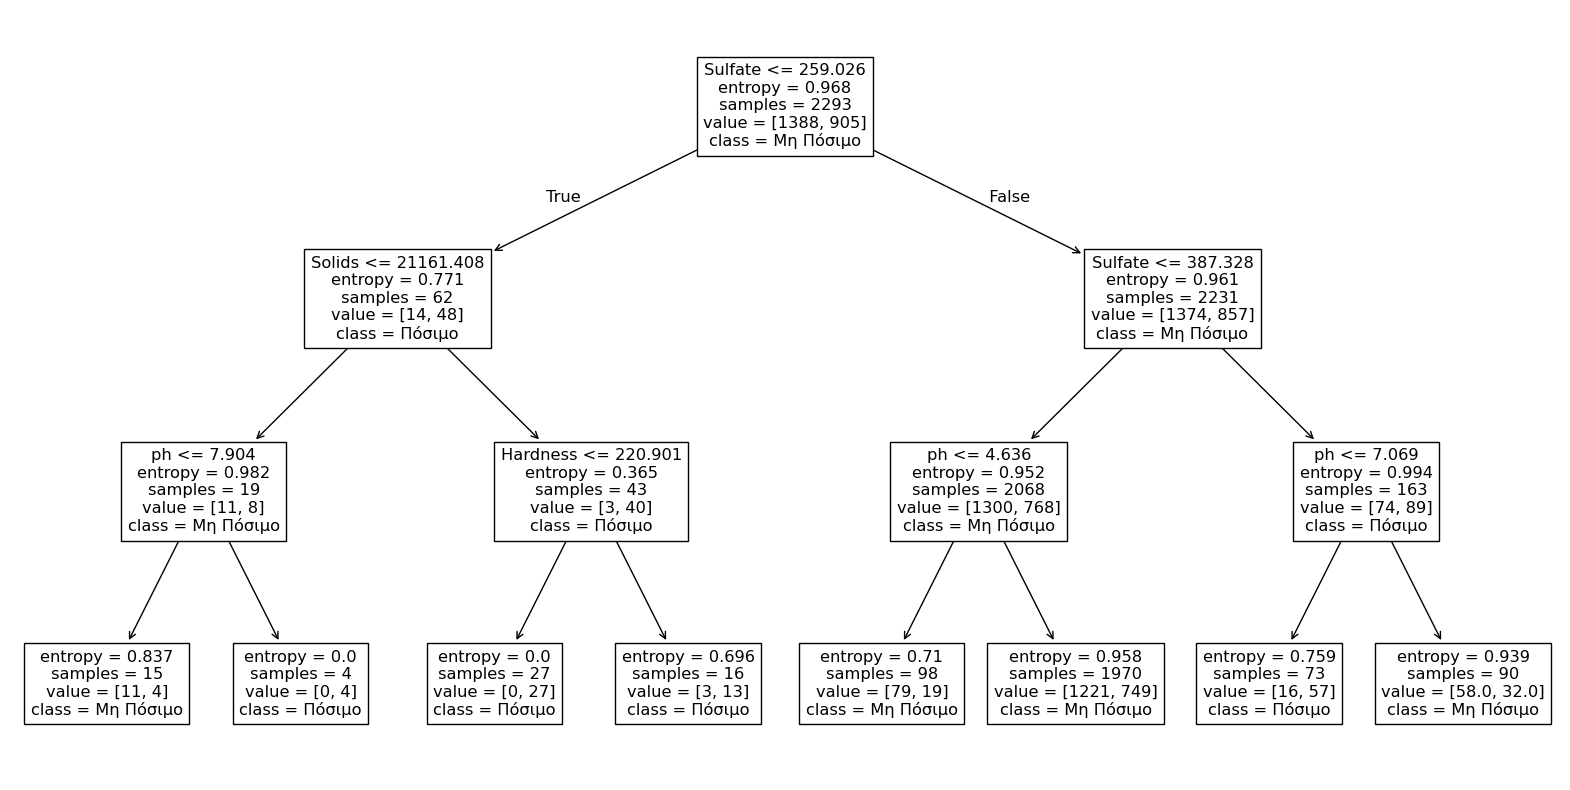

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    best_tree,
    feature_names=df.drop('Potability', axis=1).columns,
    class_names=['Μη Πόσιμο', 'Πόσιμο']
)
plt.show()

Το δέντρο απόφασης με μέγιστο βάθος 3 χρησιμοποίησε κυρίως τις μεταβλητές Sulfate, Solids, ph και Hardness για να προβλέψει αν το νερό είναι πόσιμο ή μη-πόσιμο. Στη ρίζα του δέντρουχρησιμοποιείται η μεταβλητή Sulfate. Όταν Sulfate <= 259.026 το νερό ταξινομείται κυρίως ως μη πόσιμο και 62 δείγματα ικανοποιούν αυτή τη συνθήκη ενώ τα υπόλοιπα όχι. Στην αριστερή πλευρά του δέντρου, το κριτήριο Solids καθορίζει τη διακλάδωση — και στη συνέχεια οι μεταβλητές pH και Hardness. Παρατηρούμε ότι και στις δύο περιπτώσεις καταλήγουμε σε αμιγούς κόμβους καθώς η εντροπία είναι μηδέν.Για μικρές τιμές της μεταβλητής Hardness το νερό ταξινομείται ως πόσιμο. Στη δεξιά πλευρά του δέντρου χρησιμοποιείται ξανά η μεταβλητή Sulfate, ενώ στη συνέχεια η μεταβλητή pH. Οι τιμές της μεταβλητής ph κάτω από 4.6 υποδηλώνει μη πόσιμο νερό, ενώ τιμές πάνω από 4.6 συνδέονται με πόσιμο. Αντίστοιχα, για μεγάλες τιμές της μεταβλητής Sulfate οι τιμές pH έως 7.1 οδηγούν σε πόσιμο νερό, ενώ υψηλότερες τιμές σε μη πόσιμο.

In [ ]:
best_row = results_df.loc[results_df['test_acc'].idxmax()]
print("Καλύτερος συνδυασμός:")
print(best_row)

Καλύτερος συνδυασμός:
criterion             entropy
max_depth                 5.0
min_samples_split           2
min_samples_leaf            2
max_features             None
ccp_alpha                 0.0
train_acc            0.671173
test_acc             0.655137
Name: 84, dtype: object


In [ ]:
best_tree = DecisionTreeClassifier(
    criterion=best_row['criterion'],
    max_depth=int(best_row['max_depth']),
    min_samples_split=int(best_row['min_samples_split']),
    min_samples_leaf=int(best_row['min_samples_leaf']),
    max_features=None,
    ccp_alpha=int(best_row['ccp_alpha']))

best_tree.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=5,
                       min_samples_leaf=2)

Text(0.5, 1.0, 'Σημαντικότητα Χαρακτηριστικών στο Decision Tree')

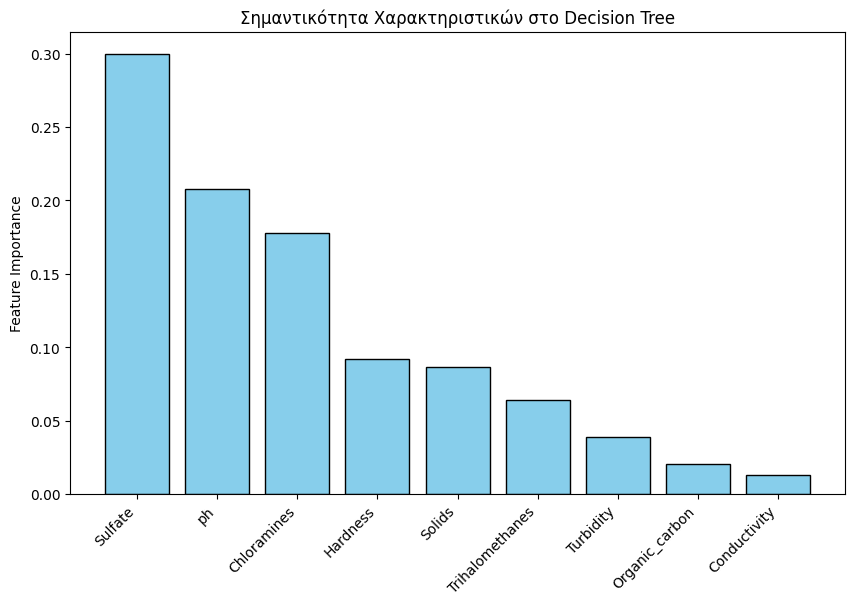

In [ ]:
feature_names = df.drop('Potability', axis=1).columns

importances = best_tree.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], color='skyblue', edgecolor='k')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title('Σημαντικότητα Χαρακτηριστικών στο Decision Tree')

Αν η συσκευή μπορεί να πραγματοποιεί μέχρι 5 μετρήσεις, τότε οι μεταβλητές που είναι πιο χρήσιμες είναι αυτές με την μεγαλύτερη σημαντικότητα (Sulfate, ph,Chloramines, Hardness και Solids). Αυτά τα πέντε χαρακτηριστικά εξηγούν το μεγαλύτερο ποσοστό της προβλεπτικής ικανότητας του μοντέλου και άρα μπορούν να προβλέψουν με μεγάλη ακρίβεια αν το νερό είναι πόσιμο ή όχι.

Ένα Random Forest συχνά επιτυγχάνει καλύτερη ακρίβεια από ένα μεμονωμένο Decision Tree γιατί συνδυάζει πολλά δέντρα που εκπαιδεύονται σε τυχαία υποσύνολα των δεδομένων και των χαρακτηριστικών. Αυτό μειώνει τον κίνδυνο το μοντέλο να μαθαίνει πολύ καλά τα δεδομένα μαθησης και να μην έχει καλή επίδοση στο test set, καθιστώντας το μοντέλο πιο σταθερό και λιγότερο ευαίσθητο σε θόρυβο ή τυχαίες διακυμάνσεις των δεδομένων. Επιπλέον, ο συνδυασμός των πολλών δέντρων μέσω πλειοψηφίας εξομαλύνει τα σφάλματα κάθε μεμονωμένου δέντρου, βελτιώνοντας τη γενίκευση και την ακρίβεια στο test set. Συνολικά, το Random Forest παρέχει πιο αξιόπιστες και σταθερές προβλέψεις σε σχέση με ένα μοναδικό Decision Tree.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_list = [None, 'sqrt']
n_estimators_list = [50, 100, 200]
ccp_alphas = [0, 0.01]

In [ ]:
results = []

for params in product(criteria, max_depths, min_samples_splits, min_samples_leafs, max_features_list, n_estimators_list, ccp_alphas):
    criterion, max_depth, min_samples_split, min_samples_leaf, max_features, n_estimators, ccp_alpha = params

    rf = RandomForestClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        n_estimators=n_estimators,
        ccp_alpha=ccp_alpha,
        random_state=0,
        n_jobs=-1
    )

    rf.fit(x_train, y_train)

    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'n_estimators': n_estimators,
        'ccp_alpha': ccp_alpha,
        'train_acc': train_acc,
        'test_acc': test_acc
    })

results_df = pd.DataFrame(results)

print(results_df)

    criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
0        gini        NaN                  2                 1         None   
1        gini        NaN                  2                 1         None   
2        gini        NaN                  2                 1         None   
3        gini        NaN                  2                 1         None   
4        gini        NaN                  2                 1         None   
..        ...        ...                ...               ...          ...   
283   entropy        5.0                  5                 2         sqrt   
284   entropy        5.0                  5                 2         sqrt   
285   entropy        5.0                  5                 2         sqrt   
286   entropy        5.0                  5                 2         sqrt   
287   entropy        5.0                  5                 2         sqrt   

     n_estimators  ccp_alpha  train_acc  test_acc  
0          

Σε εφαρμογές ασφαλούς κατανάλωσης νερού το πιο σημαντικό είναι το μοντέλο να προβλέπει σωστά το μη-πόσιμο νερό, ακόμη κι αν χάνονται κάποιες περιπτώσεις πόσιμου νερού. Αυτό μειώνει τον κίνδυνο να καταναλωθεί νερό το οποίο είναι ακατάλληλο και μπορεί να έχει σοβαρές συνέπειες για την υγεία. Αντίθετα, η χαμηλότερη ακρίβεια στην αναγνώριση του πόσιμου νερού είναι λιγότερο επικίνδυνη γιατί δεν εμπεριέχει κίνδυνο, καθώς το νερό κατατάσσεται ως μη-πόσιμο ενώ στην πραγματικότητα είναι πόσιμο. Συνεπώς, η προτεραιότητα θα πρέπει να δίνεται στην ευαισθησία για το μη-πόσιμο νερό, διασφαλίζοντας ότι οι λανθασμένες προβλέψεις δεν θέτουν σε κίνδυνο την ασφάλεια των καταναλωτών.

Νομικά ασφαλέστερο για την εταιρία είναι συνήθως η χρήση του καλύτερου Random Forest αντί ενός μεμονωμένου Decision Tree, καθώς παρέχει πιο σταθερές και ακριβείς προβλέψεις μειώνοντας την πιθανότητα λάθους. Αυτό σημαίνει ότι μειώνεται ο κίνδυνος να χαρακτηριστεί μη-πόσιμο νερό ως πόσιμο, κάτι που θα μπορούσε να οδηγήσει σε νομικές ευθύνες ή αγωγές από καταναλωτές. Ωστόσο, ένα μειωνέκτημα είναι ότι το Random Forest δεν είναι εύκολο να να εξηγήσεις πώς βγαίνουν οι τελικές προβλέψεις σε αντίθεση με τα Decision Trees που είναι εύκολος και κατανοητός ο τρόπος λειτουργίας τους.